<a href="https://colab.research.google.com/github/sin-hyunjin/Ai_Deep_Learning/blob/main/ex00_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%A7%9B%EB%B3%B4%EA%B8%B0(%EB%8F%99%EB%AC%BC_10%EC%A2%85_%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 실습목표
- kerse를 이용한 딥러닝 모델링 익숙해지기
- 데이터로드 > 전처리(이미지특징추출) > 학습 > 평가
- GPU환경 활용해보기



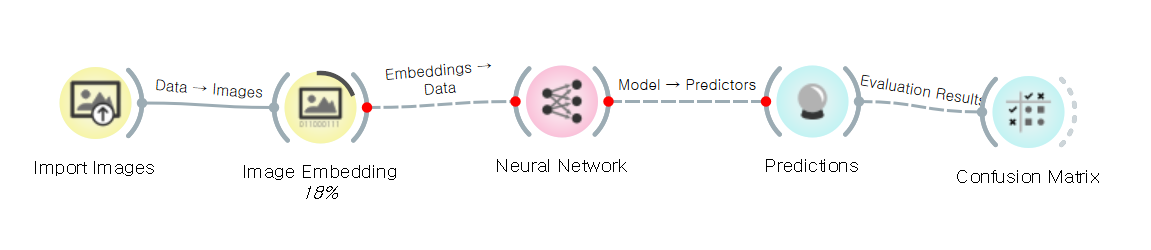

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm # 반복문 작업의 진척률을 알려주는 도구
from tensorflow.keras.utils import image_dataset_from_directory # 폴더로부터 이미지를 로딩하는 함수
from tensorflow.keras.applications import InceptionV3 # 이미지 특징을 추출하는 도구
from tensorflow.keras.applications.inception_v3 import preprocess_input # 이미지의 픽셀값을 0~255 -> 1 ~ -1 로변환
from tensorflow.keras.models import Sequential # 신경망을 하나로 묶어주는툴
from tensorflow.keras.layers import Dense # 뉴런의 묶음

# 1.데이터 로딩


In [ ]:
!pwd


/content


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/Ai_Deep_Learning"

/content/drive/MyDrive/Colab Notebooks/Ai_Deep_Learning


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/Ai_Deep_Learning


In [ ]:
!ls

 data  'ex00_딥러닝 맛보기(동물 10종 분류).ipynb'   README.md


In [ ]:
# 압축풀기
# !unzip ./data/raw-img_small.zip의\ 사본 -d ./data/animal_small/

In [ ]:
train_data = image_dataset_from_directory(
    directory = "./data/animal_small/raw-img - 복사본", # 읽어들일 폴더
    labels = "inferred", # 폴더명을 인식해서 사진마다 정답으로 붙여 줌
    label_mode = 'categorical', # 다중분류 형태로 정답이 생성
    color_mode = 'rgb', # 컬러사진 설정
    image_size = (224 ,224) # 읽어들인 사진의 크기 crop


)


Found 1720 files belonging to 10 classes.


In [ ]:
X_train = [] # 읽어들인 사진데이터가 저장될 리스트
y_train = [] # 읽어들인 정답데이터가 저장될 리스트

In [ ]:
# 32장씩 문제와 정답 로딩
for img, label in tqdm(train_data.as_numpy_iterator()): #tqdm -> 반복된 횟수를 알수있다.
  X_train.append(img)
  y_train.append(label)

54it [00:04, 11.77it/s]


In [ ]:
# 리스트에 담겨있는 사진데이터 및 정답데이터를 하나의 넘파이로 통합
X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)
print(X_train.shape, y_train.shape)

(1720, 224, 224, 3) (1720, 10)


# 2. 이미지 특징추출(전처리)



In [ ]:
print(X_train.max(), X_train.min())


255.0 0.0


In [ ]:
X_train = preprocess_input(X_train)

In [ ]:
print(X_train.max(), X_train.min())

1.0 -1.0


In [ ]:
imageEmbedding = InceptionV3(include_top=False,
                             weights ='imagenet',
                             input_shape=(224,224,3),
                             pooling='avg')

# 3.인공신경망 설계 및 학습

In [ ]:
my_animal_model = Sequential() # 틀 생성
my_animal_model.add(imageEmbedding)
my_animal_model.add(Dense(units=100, activation='relu'))
my_animal_model.add(Dense(units=5, activation='relu'))
my_animal_model.add(Dense(units=10, activation='softmax'))


In [ ]:
my_animal_model.compile(loss="categorical_crossentropy",  # 모델의 잘못된 정도를 파악하는 알고리즘
                        optimizer="Adam", # 모델의 최적화를 도와주는 알고리즘
                        metrics=["accuracy"])

In [ ]:
my_animal_model.fit(X_train, y_train, epochs=20)

KeyboardInterrupt: ignored

# 4. 예측 및 학습결과 평가





In [ ]:
# 1. text-img.zip 압출풀기
!unzip ./data/test-img.zip ./data/animal_small/



unzip:  cannot find or open ./data/test-img.zip, ./data/test-img.zip.zip or ./data/test-img.zip.ZIP.


In [ ]:
# 2. image_dateset_from_directory 이용해서 X_test, y_test 만들기
train_data = image_dataset_from_directory(
    directory = "./data/animal_small/raw-img - 복사본", # 읽어들일 폴더
    labels = "inferred", # 폴더명을 인식해서 사진마다 정답으로 붙여 줌
    label_mode = 'categorical', # 다중분류 형태로 정답이 생성
    color_mode = 'rgb', # 컬러사진 설정
    image_size = (224 ,224) # 읽어들인 사진의 크기 crop

)

In [ ]:
# 3. preprocess_input 이용해서 X_test를 -1 ~ 1 사이로 만들기

